In [19]:
# Necessary imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.probability import FreqDist


import emoji
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Preprocessing:

rawText = open("PC 1000 Post Training Dataset.txt", "r", encoding="UTF-8").read()
lemmatizer = WordNetLemmatizer()

# Stopword removal function
def remove_stopwords(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [w for w in text if not w in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

# URL Removal
noURLText = re.sub(r'http\S+', '', rawText)

# Emoji Removal
emojilessText = emoji.replace_emoji(noURLText, replace='')

# Stop word Removal
filteredText = remove_stopwords(emojilessText)

# Text tokenization
tokenizedText = nltk.word_tokenize(filteredText)

# Converting all tokens to lowercase
lowerCaseText = [word.lower() for word in tokenizedText]

# Fully preprocessed Text
pre_processedText = lowerCaseText

In [13]:
# Sentiment Analysis Using Vader:

results = []
sia = SIA()

# Dataframe construction/VADER polarity analysis
for sentences in pre_processedText:
    polarityScore = sia.polarity_scores(sentences)
    polarityScore['words'] = sentences
    results.append(polarityScore)

pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df


,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,thread
1,0.0,1.0,0.0,0.0000,simple
2,0.0,1.0,0.0,0.0000,questions
3,0.0,1.0,0.0,0.0000,warrant
4,0.0,1.0,0.0,0.0000,thread
...,...,...,...,...,...
111626,0.0,0.0,1.0,0.4019,interested
111627,0.0,1.0,0.0,0.0000,end
111628,0.0,1.0,0.0,0.0000,result
111629,0.0,1.0,0.0,0.0000,process


In [14]:
# Assinging sentiment labels to each word
df['label'] = 0
df.loc[df['compound'] > .10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1

print(df.label.value_counts())

 0    99046
 1     9270
-1     3315
Name: label, dtype: int64


Text(0, 0.5, 'Percentage')

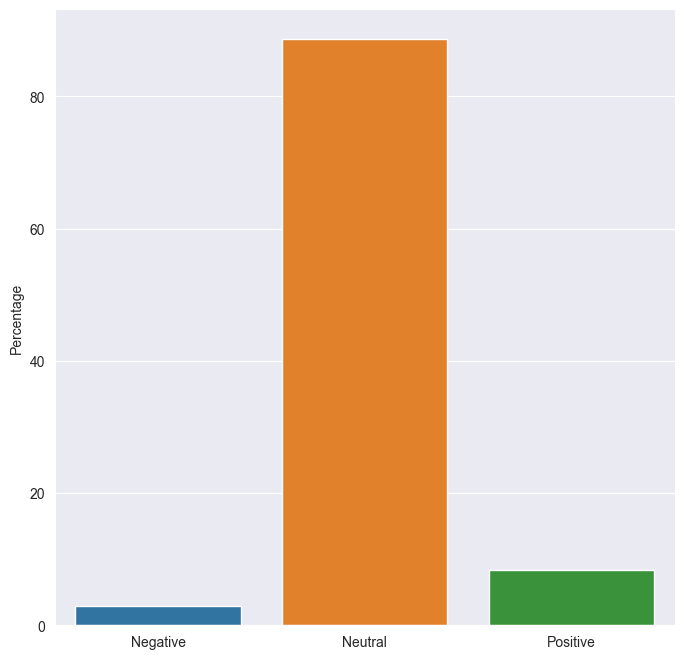

In [15]:
# Representation of dataset as a bar graph
fig, ax = plt.subplots(figsize = (8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

Text(0, 0.5, 'Percentage')

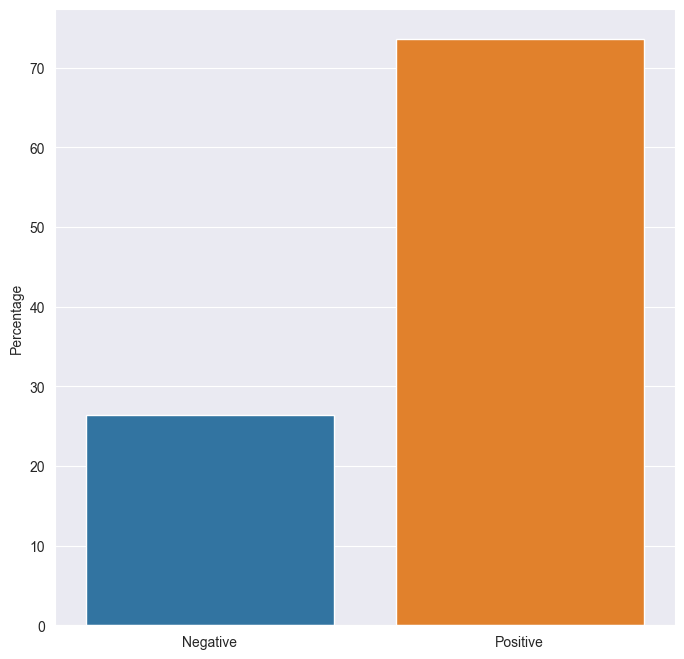

In [16]:
# Representation of dataset as a bar graph without neutral words

df_positive_negative = df.loc[df['label'] != 0]

fig, ax = plt.subplots(figsize = (8,8))

counts = df_positive_negative.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Positive'])
ax.set_ylabel("Percentage")

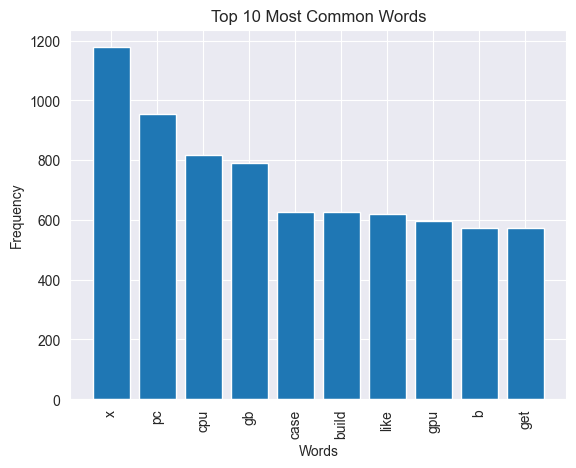

In [23]:
# Word Frequency Distribution

all_words = []
for text in pre_processedText:
    words = nltk.word_tokenize(text)
    all_words += words
word_freq = FreqDist(all_words)

# Representing the 10 most common words as a bar graph
most_common_words = word_freq.most_common(10)
x, y = zip(*most_common_words)
plt.bar(x, y)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()